In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('movies_metadata\movies_metadata.csv',low_memory=False)

In [3]:
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [6]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [4]:
df.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

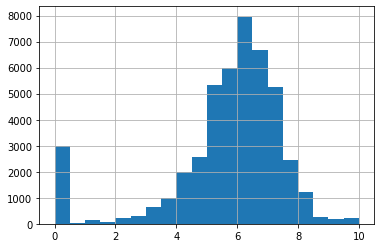

In [7]:
df['vote_average'].hist(bins=20)

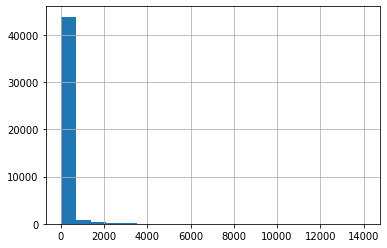

In [8]:
df["vote_count"].hist(bins=20)

Building Recommendation System using collabarative filtering

In [9]:
c=df['vote_average'].mean()
c

5.618207215133889

In [10]:
m=df['vote_count'].quantile(0.9)
m

160.0

Selecting movies with runtime as 150 mins and revenue greater than 300000000 with details of movie

In [11]:
rm=df[(df['runtime']>150)&(df['revenue']>300000000)&(df['homepage'].notna())]

In [12]:
rm.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
522,False,NaN,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,...,1993-11-29,3.213656e+08,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0
1639,False,NaN,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",...,1997-11-18,1.845034e+09,194.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0
4766,False,"{'id': 1241, 'name': 'Harry Potter Collection'...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://harrypotter.warnerbros.com/harrypottera...,671,tt0241527,en,Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,...,2001-11-16,9.764756e+08,152.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Let the Magic Begin.,Harry Potter and the Philosopher's Stone,False,7.5,7188.0
4863,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120,tt0120737,en,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a...",...,2001-12-18,8.713684e+08,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,False,8.0,8892.0
5814,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",79000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,121,tt0167261,en,The Lord of the Rings: The Two Towers,Frodo and Sam are trekking to Mordor to destro...,...,2002-12-18,9.262874e+08,179.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Power Is Rising.,The Lord of the Rings: The Two Towers,False,8.0,7641.0


Selecting movies whose vote count is greater than or equal to 90% of  vote count on entire dataset

In [13]:
rm=rm[rm['vote_count']>=m]

In [14]:
rm.shape

(27, 24)

In [15]:
def wr(x,m=m,c=c):
    v=x['vote_count']
    r=x['vote_average']
    return (v/(v+m)*r)+(m/(m+v)*c)

In [16]:
rm['score']=rm.apply(wr,axis=1)

In [17]:
rm

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,score
522,False,NaN,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,...,3.213656e+08,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0,8.206639
1639,False,NaN,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",...,1.845034e+09,194.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0,7.462032
4766,False,"{'id': 1241, 'name': 'Harry Potter Collection'...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://harrypotter.warnerbros.com/harrypottera...,671,tt0241527,en,Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,...,9.764756e+08,152.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Let the Magic Begin.,Harry Potter and the Philosopher's Stone,False,7.5,7188.0,7.459025
4863,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120,tt0120737,en,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a...",...,8.713684e+08,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,False,8.0,8892.0,7.957900
5814,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",79000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,121,tt0167261,en,The Lord of the Rings: The Two Towers,Frodo and Sam are trekking to Mordor to destro...,...,9.262874e+08,179.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Power Is Rising.,The Lord of the Rings: The Two Towers,False,8.0,7641.0,7.951149
7000,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",94000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net,122,tt0167260,en,The Lord of the Rings: The Return of the King,Aragorn is revealed as the heir to the ancient...,...,1.118889e+09,201.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The eye of the enemy is moving.,The Lord of the Rings: The Return of the King,False,8.1,8226.0,8.052649
10554,False,"{'id': 1241, 'name': 'Harry Potter Collection'...",150000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://harrypotter.warnerbros.com/,674,tt0330373,en,Harry Potter and the Goblet of Fire,"Harry starts his fourth year at Hogwarts, comp...",...,8.959210e+08,157.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Dark And Difficult Times Lie Ahead.,Harry Potter and the Goblet of Fire,False,7.5,5758.0,7.449124
11008,False,"{'id': 295, 'name': 'Pirates of the Caribbean ...",200000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,58,tt0383574,en,Pirates of the Caribbean: Dead Man's Chest,Captain Jack Sparrow works his way out of a bl...,...,1.065660e+09,151.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jack is back!,Pirates of the Caribbean: Dead Man's Chest,False,7.0,5380.0,6.960093
11067,False,"{'id': 8537, 'name': 'Superman Collection', 'p...",270000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.superman.com,1452,tt0348150,en,Superman Returns,Superman returns to discover his 5-year absenc...,...,3.910812e+08,154.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Superman Returns,False,5.4,1429.0,5.421972
11827,False,"{'id': 295, 'name': 'Pirates of the Caribbean ...",30

In [18]:

rm=rm.sort_values('score',ascending=False)

In [19]:
rm

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,score
12481,False,"{'id': 263, 'name': 'The Dark Knight Collectio...",185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://thedarkknight.warnerbros.com/dvdsite/,155,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,...,1.004558e+09,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Why So Serious?,The Dark Knight,False,8.3,12269.0,8.265477
522,False,NaN,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,...,3.213656e+08,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0,8.206639
22879,False,NaN,165000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",http://www.interstellarmovie.net/,157336,tt0816692,en,Interstellar,Interstellar chronicles the adventures of a gr...,...,6.751200e+08,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,False,8.1,11187.0,8.065005
7000,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",94000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net,122,tt0167260,en,The Lord of the Rings: The Return of the King,Aragorn is revealed as the heir to the ancient...,...,1.118889e+09,201.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The eye of the enemy is moving.,The Lord of the Rings: The Return of the King,False,8.1,8226.0,8.052649
4863,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120,tt0120737,en,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a...",...,8.713684e+08,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,False,8.0,8892.0,7.957900
5814,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",79000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,121,tt0167261,en,The Lord of the Rings: The Two Towers,Frodo and Sam are trekking to Mordor to destro...,...,9.262874e+08,179.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Power Is Rising.,The Lord of the Rings: The Two Towers,False,8.0,7641.0,7.951149
22131,False,NaN,100000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.thewolfofwallstreet.com/,106646,tt0993846,en,The Wolf of Wall Street,A New York stockbroker refuses to cooperate in...,...,3.920007e+08,180.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,EARN. SPEND. PARTY.,The Wolf of Wall Street,False,7.9,6768.0,7.847303
13605,False,NaN,70000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://www.inglouriousbasterds-movie.com/,16869,tt0361748,en,Inglourious Basterds,"In Nazi-occupied France during World War II, a...",...,3.191310e+08,153.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,Once upon a time in Nazi occupied France...,Inglourious Basterds,False,7.9,6598.0,7.845977
20051,False,NaN,100000000,"[{'id': 18, 'name': 'Drama'}, {'id': 37, 'name...",http://unchainedmovie.com/,68718,tt1853728,en,Django Unchained,"With the help of a German bounty hunter, a fre...",...,4.253682e+08,165.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"Life, liberty and the pursuit of vengeance.",Django Unchained,False,7.8,10297.0,7.766617
18252,False,"{'id': 263, 'name': 'The Dark Knight Collectio...",250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,tt1345836,en,The Dark Knight Rises,Following the death of District Attorney 

In [20]:
rm[['title','vote_count','vote_average','score']].head(10)

,title,vote_count,vote_average,score
12481,The Dark Knight,12269.0,8.3,8.265477
522,Schindler's List,4436.0,8.3,8.206639
22879,Interstellar,11187.0,8.1,8.065005
7000,The Lord of the Rings: The Return of the King,8226.0,8.1,8.052649
4863,The Lord of the Rings: The Fellowship of the Ring,8892.0,8.0,7.957900
5814,The Lord of the Rings: The Two Towers,7641.0,8.0,7.951149
22131,The Wolf of Wall Street,6768.0,7.9,7.847303
13605,Inglourious Basterds,6598.0,7.9,7.845977
20051,Django Unchained,10297.0,7.8,7.766617
18252,The Dark Knight Rises,9263.0,7.6,7.566350


Text(0.5, 1.0, 'MOst voted Movies')

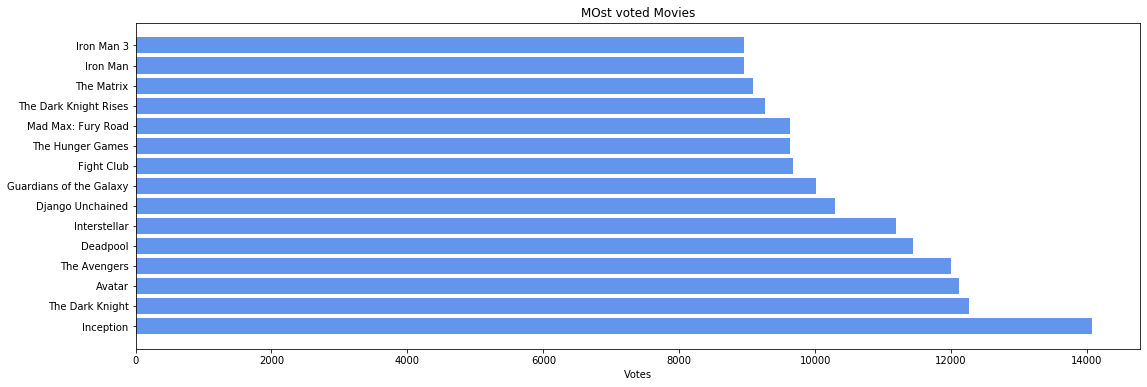

In [23]:
d=df.sort_values('vote_count',ascending=False)
plt.figure(figsize=(18,6))

plt.barh(d['title'].head(15),d['vote_count'].head(15),align='center',color='cornflowerblue')

plt.xlabel("Votes")
plt.title("MOst voted Movies")